In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

2022-10-30 22:53:44.630875: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


*For our purposes, we'll use the make_blobs method to create 1,000 samples with two features (also known as our x- and y-axis values) that are linearly separable into two groups. In our notebook, we can generate and visualize our dummy data using the following code*

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

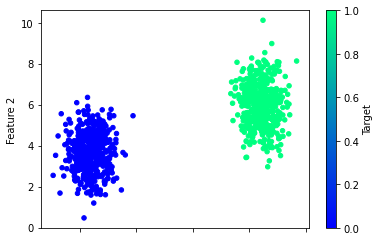

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

*Once we have our dummy data generated, we'll split our data into training and test datasets using Scikit-learn's train_test_split method*

In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

*Теперь, когда у нас есть данные об обучении, нам нужно подготовить набор данных для нашей модели нейронной сети. Как и в случае с любым алгоритмом машинного обучения, крайне важно нормализовать или стандартизировать наши числовые переменные, чтобы гарантировать, что наша нейронная сеть не фокусируется на выбросах и может применять правильные веса к каждому входу. В большинстве случаев, чем больше входные переменные нормализуются в том же масштабе, тем стабильнее модель нейронной сети и тем лучше будет обобщать модель нейронной сети. Чтобы нормализовать наши фиктивные данные, мы добавим и запустим следующий код*

In [4]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

*Наконец, наши данные готовы для нашей первой модели нейронной сети! Чтобы создать нейронную сеть в нашем ноутбуке, сначала мы должны создать нашу последовательную модель. Для этого мы должны добавить следующий код*

In [5]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

2022-10-30 22:59:50.336420: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


*The nn_model object will store the entire architecture of our neural network model. Our next step is to add our first layer, which will contain our inputs and a hidden layer of neurons.*

*Как мы узнали ранее, мы можем добавлять слои в нашу последовательную модель, используя класс Keras Dense. Для нашего первого слоя нам нужно определить несколько параметров:
-  input_dim указывает, сколько входов будет в модели (в данном случае два).
- The units parameter indicates how many neurons we want in the hidden layer (in this case one).
- The activation parameter indicates which activation function to use. We'll use the ReLU activation function to allow our hidden layer to identify and train on nonlinear relationships in the dataset.*

In [6]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

*Еще раз, мы будем использовать класс Dense, чтобы рассказать нашей последовательной модели, что делать с данными. На этот раз нам нужно только предоставить количество выходных нейронов. Для классификационной модели нам нужно только двоичное решение "да" или "нет"; поэтому нам нужен только один выходной нейрон. На нашем предыдущем уровне мы использовали функцию активации ReLU для включения нелинейных отношений; однако для вывода классификации мы хотим использовать функцию активации сигмоида для получения вероятностного вывода. Давайте добавим следующий код*

In [7]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

*Теперь, когда мы добавили наши слои в последовательную модель, мы можем дважды проверить структуру нашей модели с помощью метода summary. Попробуйте запустить следующий код *

In [8]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


*Теперь, когда мы определили наши уровни, мы должны проинформировать модель о том, как она должна тренироваться с использованием входных данных. Процесс информирования модели о том, как она должна учиться и тренироваться, называется компилятором модели*
*В зависимости от функции нейронной сети нам придется скомпилировать нейронную сеть, используя конкретную функцию оптимизации и метрику потерь. Функция оптимизации формирует и формирует модель нейронной сети во время обучения, чтобы убедиться, что она работает в меру своих возможностей. Метрика потерь используется алгоритмами машинного обучения для оценки производительности модели через каждую итерацию и эпоху путем оценки неточности одного входа. Для повышения производительности нашей классификационной нейронной сети мы будем использовать оптимизатор adam, который использует подход градиентного спуска, чтобы гарантировать, что алгоритм не застрянет на более слабых классифицирующих переменных и функциях. Что касается функции потерь, мы будем использовать binary_crossentropy, которая специально разработана для оценки модели двоичной классификации*
*In addition to the optimization function and loss metric, we'll also add a more reader-friendly evaluation metric, which measures the quality of the machine learning model. There are two main types of evaluation metrics—the model predictive accuracy and model mean squared error (MSE). We use accuracy for classification models and msefor regression models.* 

**For model predictive accuracy, the higher the number the better, whereas for regression models, MSE should reduce to zero.**

*Объединив все эти показатели, мы добавим и запустим следующий код*

In [9]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

*To train/fit our Keras model, we'll use the fit method and provide the x training values and y training values, as well as the number of epochs. Each epoch is a complete pass through the training data. As we tested earlier in the TensorFlow Playground, the neural network binary classification model reached optimal performance at around 100 epochs. Since we designed our Sequential model to match the TensorFlow Playground simulation, we should expect similar performance*

In [10]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5344 - accuracy: 0.8467
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5228 - accuracy: 0.8653
Epoch 3/100
24/24 [==============================] - 0s 969us/step - loss: 0.5114 - accuracy: 0.8720
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5005 - accuracy: 0.8787
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4897 - accuracy: 0.8827
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4794 - accuracy: 0.8853
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4691 - accuracy: 0.8907
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4590 - accuracy: 0.8960
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4489 - accuracy: 0.9000
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4392 - accuracy: 0.9027
Epoch 1

**Глядя на результат обучения модели, мы знаем, что показатель потерь (loss metric) составил 0,07, а точность прогнозирования (predictive accuracy) - 1,0. Это означает, что, хотя производительность нашей модели имела больше потерь, чем данные моделирования, модель правильно классифицирует все наши тренировочные данные, что достаточно для наших нужд.**

*По завершении обучения объект модели сохраняет показатели потерь и точности во все эпохи, которые мы можем использовать для визуализации прогресса обучения. Например, если мы хотим визуализировать потерю нашей модели в течение всех 100 эпох, мы можем запустить следующий код в наших ноутбуках:*

<AxesSubplot:>

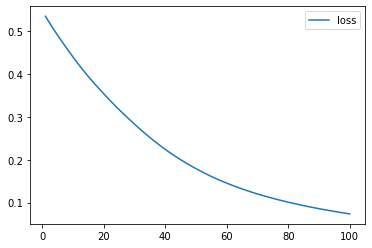

In [11]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

*Аналогичным образом, мы можем построить график точности с течением времени, используя один и тот же DataFrame:*

<AxesSubplot:>

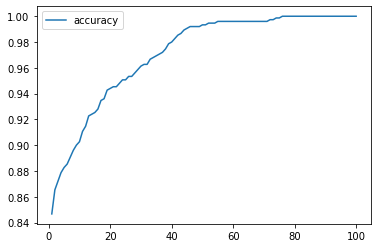

In [12]:
# Plot the accuracy
history_df.plot(y="accuracy")

*Now that our model has been properly trained, we must evaluate model performance using the test data. Testing a neural network model in TensorFlow is very similar to testing a machine learning model in Scikit-learn. For our purposes, we'll use the evaluate method and print the testing loss and accuracy values. In our notebooks, we'll add and run the following code:*

In [13]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0750 - accuracy: 1.0000 - 146ms/epoch - 18ms/step
Loss: 0.07500655204057693, Accuracy: 1.0


*Глядя на показатели производительности модели, нейронная сеть смогла правильно классифицировать каждую из точек в тестовых данных. Другими словами, модель смогла правильно классифицировать данные, которые она не обучала в 100% случаев.*

*Now that we have a trained neural network model and we have verified its performance using a test dataset, we can apply this model to novel datasets and predict the classification of a data point. In our Sequential model, we can use the predict method to generate predictions on new data. For example, if we wanted to predict the class of a new blob dataset, we can add and run the following code:*

In [14]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

1/1 [==============================] - 0s 75ms/step


array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]], dtype=int32)

                     **Nuances of Neural Networks on Nonlinear Numbers**

*To test this behavior, let's generate some new dummy data. This time we'll generate some nonlinear moon-shaped data using Scikit-learn's make_moons method and visualize it using Pandas and Matplotlib. Using the same notebook, we'll add and run the following code:*

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

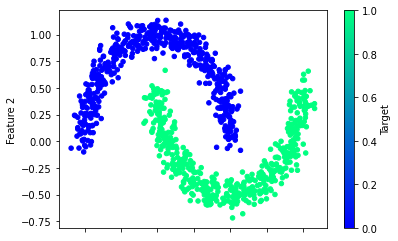

In [15]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

*Since we are not changing the structure of our neural network, nor are we changing its function, we can use the same Sequential model object. The only difference from our previous workflow is this time we will retrain and evaluate on the nonlinear moon-shaped data.*

*Как и в нашем предыдущем примере фиктивных данных, нам нужно разделить наши нелинейные данные на наборы данных для обучения и тестирования и нормализовать наши наборы данных. В том же блокноте мы добавим и запустим следующий код:*

In [16]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

*Just as we did with the linear data, we'll train our neural network model using the fit method on the nonlinear training data. Let's add and run the following code to our notebooks:*

In [17]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 1s 1ms/step - loss: 1.1518 - accuracy: 0.4653
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.9865 - accuracy: 0.5027
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8828 - accuracy: 0.5267
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8094 - accuracy: 0.5400
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7531 - accuracy: 0.5680
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7061 - accuracy: 0.5840
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6669 - accuracy: 0.6053
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6311 - accuracy: 0.6293
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5998 - accuracy: 0.6413
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5717 - accuracy: 0.6507
Epoch 11/

<AxesSubplot:>

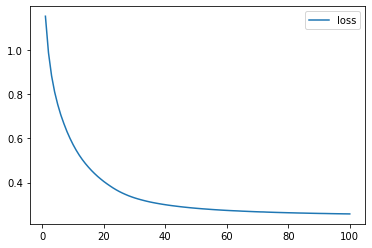

In [18]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

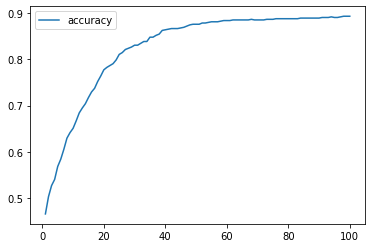

In [19]:
# Plot the accuracy
history_df.plot(y="accuracy")

***во многих промышленных и медицинских случаях точность классификации модели должна превышать 95% или даже 99%. В этих случаях нас не устроит базовая однонейронная, однослойная модель нейронной сети, и нам придется спроектировать более надежную нейронную сеть. Таким образом, чем сложнее и нелинейнее набор данных, тем больше компонентов нам нужно будет добавить в нейронную сеть для достижения желаемой производительности.***

             **Create the Connective Tissue, the Multiple Neuron Neural Network**

*К счастью, проектирование нейронной сети с большим количеством слоев - это тот же рабочий процесс, что и раньше, за исключением того, что мы настраиваем несколько параметров.*
*Поскольку мы хотим изменить структуру нашей модели нейронной сети, мы должны сначала создать новую последовательную модель, добавив следующий код в наш блокнот и запустив его.*

In [20]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

*Используя нашу новую последовательную модель, мы добавим наши входные, скрытые и выходные слои с помощью класса Dense. Однако на этот раз мы создадим скрытый слой с шестью нейронами вместо одного, изменив параметр units, сохранив при этом все остальные параметры прежними. В наши ноутбуки мы добавим и запустим следующий код*

In [21]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

*Теперь, когда определена наша новая последовательная модель, нам нужно собрать и обучить модель, используя наши нелинейные лунные фиктивные данные. Чтобы провести прямые сравнения с нашей моделью одного нейрона, мы будем использовать те же параметры обучения, включая метрику потерь, функцию оптимизатора и количество эпох.*

In [22]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6299 - accuracy: 0.7827
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5975 - accuracy: 0.7973
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5694 - accuracy: 0.8053
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5438 - accuracy: 0.8187
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5204 - accuracy: 0.8280
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4984 - accuracy: 0.8333
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4771 - accuracy: 0.8453
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4569 - accuracy: 0.8520
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4374 - accuracy: 0.8573
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4190 - accuracy: 0.8600
Epoch 11/

*Глядя на метрики обучения нашей новой модели, по мере увеличения количества нейронов в скрытом слое точность классификации улучшается. Возможно, вы заметили, что добавление нескольких нейронов в нашу нейронную сеть не дало идеальной модели классификации. По мере того, как входные данные становятся все более сложными, нейронные сети потребуют все больше и больше настроек оптимизации для достижения желаемой точности.*